## Imports

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from time import perf_counter
from scipy.optimize import curve_fit

## Obtain and Preprocess Data

In [75]:
def line(x,a,b):
    return ((a*x) + b)

def get_data(path):
    paths_list = []
    only_filename_list = []
    for root, subdirs, files in os.walk(path):
        for file in files:
            if file[-4:] == '.csv':
                paths_list.append(os.path.join(root, file))
                only_filename_list.append(file)
    return paths_list, only_filename_list

class Data_csv:
    def __init__(self, name, data, filename):
        self.name = name
        self.data = data
        self.filename = filename

paths_list, filenames_list = get_data('Data_Linear_Regression')
class_data_list = []

i = 0
for i in range(len(paths_list)):
    class_data_list.append(Data_csv(paths_list[i], pd.read_csv(paths_list[i]),filenames_list[i]))
    #class_data_list[i].data.drop(columns = ['Unnamed: 0'], inplace = True)
    if class_data_list[i].filename.index('C') == 1:
        class_data_list[i].data['Current'] = int(filenames_list[i][0])
    else:
        class_data_list[i].data['Current'] = int(filenames_list[i][0:2]) 
    


## Fit linear regression data and plot

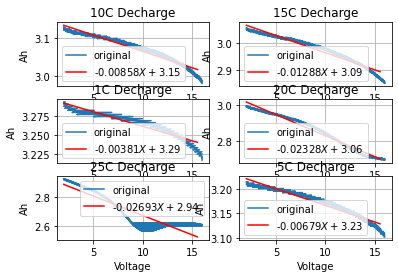

In [107]:
i = 0
for i in range(len(class_data_list)):    
    params, _ = curve_fit(line, class_data_list[i].data["x"].values, class_data_list[i].data["y"].values)

    x_line = np.arange(min(class_data_list[i].data["x"]), max(class_data_list[i].data["x"]), 0.5)
    y_line = line(x_line, params[0], params[1])


    plt.subplot(3,2,i+1)
    plt.plot(class_data_list[i].data["x"], class_data_list[i].data["y"])
    plt.plot(x_line, y_line, 'r')
    plt.legend(('original', str(params[0])[0:8]+ "$X+$" + str(params[1])[0:4]))
    plt.xlabel('Voltage')
    plt.ylabel('Ah')
    plt.title(str(class_data_list[i].data["Current"].iloc[0])+"C Decharge")
    plt.grid()
